## House Price Prediction

## Dataset Description

This dataset provides comprehensive information for house price prediction, with 13 column names:

Price: The price of the house.

Area: The total area of the house in square feet.

Bedrooms: The number of bedrooms in the house.

Bathrooms: The number of bathrooms in the house.

Stories: The number of stories in the house.

Mainroad: Whether the house is connected to the main road (Yes/No).

Guestroom: Whether the house has a guest room (Yes/No).

Basement: Whether the house has a basement (Yes/No).

Hot water heating: Whether the house has a hot water heating system (Yes/No).

Airconditioning: Whether the house has an air conditioning system (Yes/No).

Parking: The number of parking spaces available within the house.

Prefarea: Whether the house is located in a preferred area (Yes/No).

Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df=pd.read_csv('Housing.csv')

### Exploratory Data Analysis

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
##summarizing the stats of the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [22]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

<Axes: xlabel='mainroad', ylabel='count'>

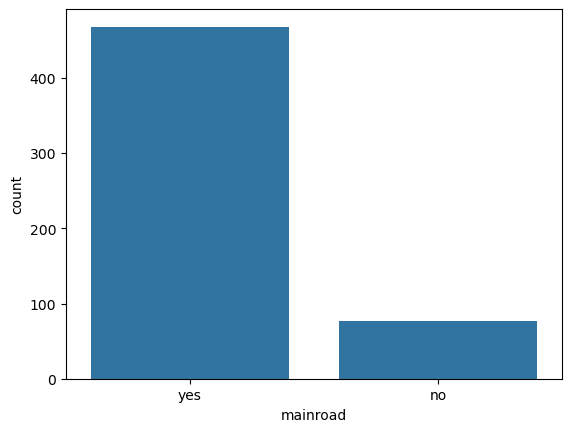

In [25]:
sns.countplot(df,x='mainroad')

Most houses are on the main road, with relatively few located off the main road, indicating an imbalanced categorical feature.

In [26]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

<Axes: xlabel='guestroom', ylabel='count'>

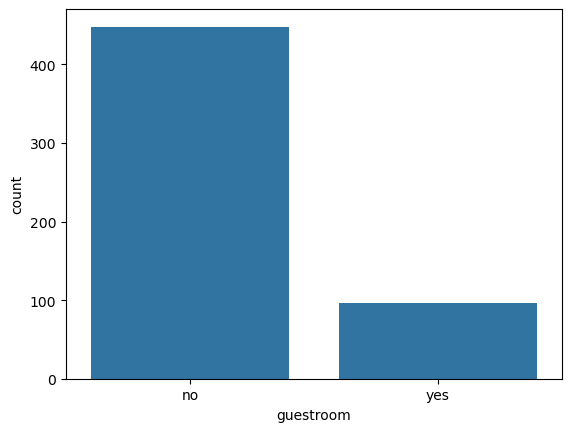

In [27]:
sns.countplot(df,x='guestroom')

Most houses do not have a guestroom, while only a smaller portion include guestroom, indicating class imbalance.

In [28]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

<Axes: xlabel='hotwaterheating', ylabel='count'>

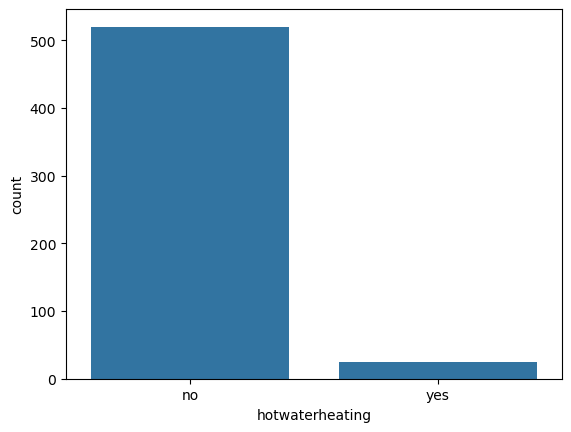

In [34]:
sns.countplot(df,x='hotwaterheating')

This feature is also imbalanced.

In [32]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

<Axes: xlabel='basement', ylabel='count'>

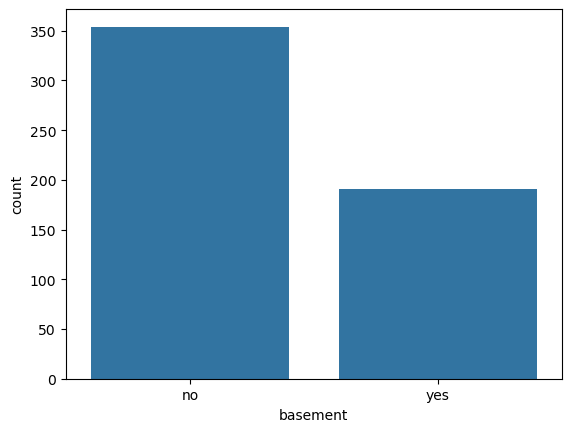

In [35]:
sns.countplot(df,x='basement')

Most houses have basement,but a signigicant proportion dont have basement

In [29]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

<Axes: xlabel='airconditioning', ylabel='count'>

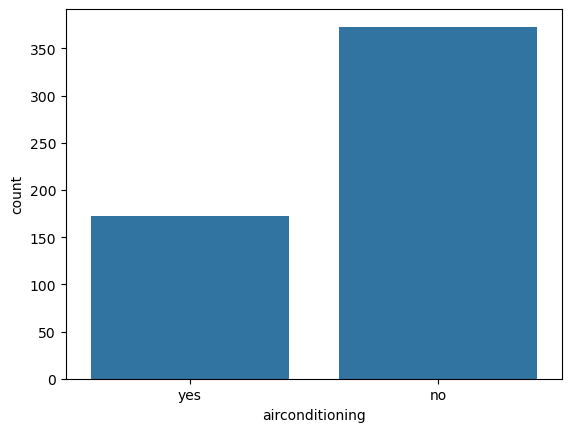

In [37]:
sns.countplot(df,x='airconditioning')

Most houses do nt have air conditioning, but a notable portion do.

In [30]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [40]:
df['prefarea'].value_counts(normalize=True)*100

prefarea
no     76.513761
yes    23.486239
Name: proportion, dtype: float64

<Axes: xlabel='prefarea', ylabel='count'>

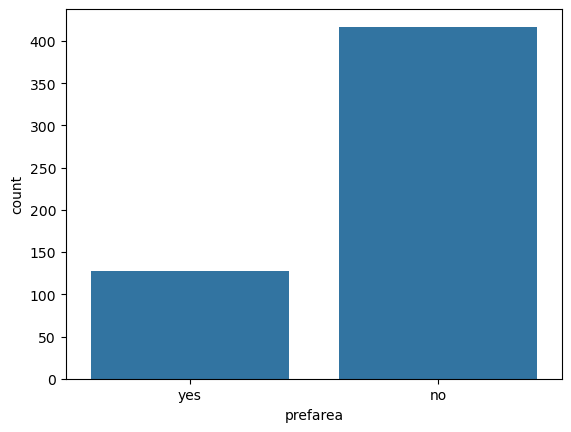

In [38]:
sns.countplot(df,x='prefarea')

Most houses are not in the preferred area (77%), while a smaller portion are (23%), indicating an imbalanced categorical features.

In [31]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

<Axes: xlabel='furnishingstatus', ylabel='count'>

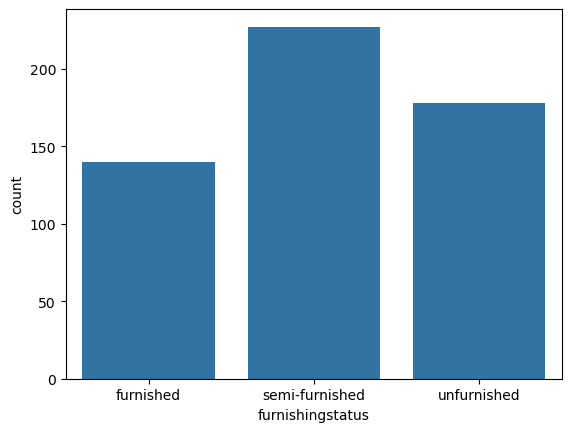

In [39]:
sns.countplot(df,x='furnishingstatus')

The dataset contains a mix of furnishing statuses: semi-furnished, unfurnished, and furnished. All categories are fairly balanced.

In [44]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [41]:
df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

<Axes: xlabel='parking', ylabel='count'>

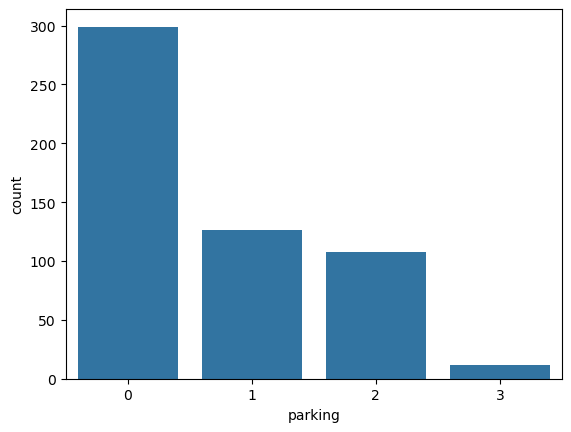

In [46]:
sns.countplot(df,x='parking')

Most houses do not have parking space available within the house, while other have some parking spaces available, This feature is ordinal.

In [48]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


<Axes: xlabel='parking', ylabel='Count'>

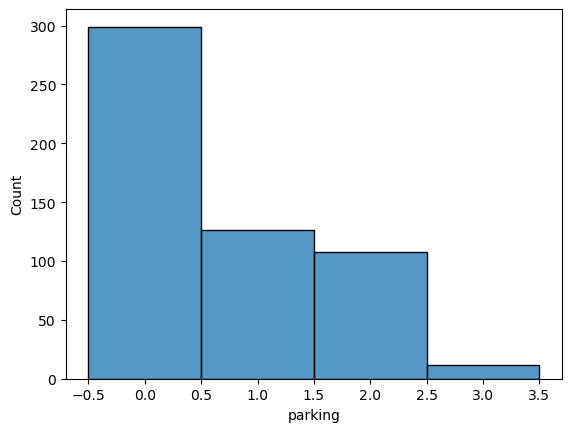

In [ ]:
sns.histplot(df['parking'],discrete=True)
